# RSSA_analyzer template
This interactive Jupyter notebook can be used as an example to see different ways to produce and customize plots of RSSA files.
One thing to take in mind is the memory limitations of the user computer in relation to the size of the RSSA file. If the RSSA file weights X Gbs the user should have more than that amount of free RAM in her computer. Files weighting many Gbs are rare but this memory limitation will be solved in future releases by reducing the amount of information extracted from each track.

## Loading and analyzing a RSSA file
The binary reader of this tool is very fast as it has been vectorized via Numpy. Reading a RSSA file of 6 Gb with the PyNE reader takes around 15 minutes while this reader does the same in 10 seconds. Lets start by loading a new RSSA file.

In [1]:
from rssa_analyzer import RSSA  # RSSA is a class representing a RSSA file

# The class is initialized by providing the path to the file 
my_rssa = RSSA(filename='tests/data/E-Lite_IVVS_v5.5.w')

Now that the file is loaded in the variable <code>my_rssa</code> we can explore its data. 

In [2]:
# This command will analyse and print to the screen relevant information
print(my_rssa)

RSSA file tests/data/E-Lite_IVVS_v5.5.w was recorded using the following surfaces:
  Surface id: 4001
The surface type is a cylinder with a radius of 1470.00
The total amount of tracks recorded is 68778474, of which 16760273 were neutrons and 52018201 were photons.
The simulation that produced this RSSA run 31000000000 histories
The amount of independent histories that reached the RSSA surfaces was 10919938.



In [3]:
my_rssa.tracks  # This is an array containing all the infomation of all the tracks
my_rssa.x  # With this command we acces a vector holding the X position of every track
my_rssa.y  
my_rssa.z  # Same for Y and Z coordinates and the Weight values of the tracks
my_rssa.wgt
my_rssa.energies
my_rssa.histories  # History number of the tracks

# Lets print some information of the 1234 track recorded in the RSSA file
index = 1234
position = (my_rssa.x[index], my_rssa.y[index], my_rssa.z[index])
print(f'The track with index {index} was recorded at position:\n{position}')
print(f'The track had an energy of {my_rssa.energies[index]} MeV and weight of {my_rssa.wgt[index]}')
print(f'The track was originated at the history number {my_rssa.histories[index]}')

The track with index 1234 was recorded at position:
(321.9463510726417, 1434.3118723035834, 35.264180328269155)
The track had an energy of 0.12669608324553938 MeV and weight of 0.19581294392533063
The track was originated at the history number 479613.0


The RSSA file may contain both neutrons and photons. The tool has a way to easily dicriminate between particle types with the use of filters, also called masks.

In [4]:
mask = my_rssa.mask_neutron_tracks  # to show only neutrons
mask = my_rssa.mask_photon_tracks  # to show only photons
my_rssa.x[mask]  # Show the x values for all the tracks included in the mask

total_amount_tracks = len(my_rssa.tracks)
print(f'This RSSA file recorded {total_amount_tracks} tracks...')
mask = my_rssa.mask_neutron_tracks
neutron_amount_tracks = len(my_rssa.tracks[mask])
print(f' of which {neutron_amount_tracks} were neutrons.')

This RSSA file recorded 68778474 tracks...
 of which 16760273 were neutrons.


## Plot cylindrical RSSA with default parameters
The level of customization possible with these type of plots is very high. The plotting functions of this tool have many parameters but most of them have default values that we can overlook. In here it is demonstrated how to produce a plot in the most simple way.

### Neutron current and relative error plot

The area of a cell is 681.83cm2
The resolution is 25.66cm x 26.58cm


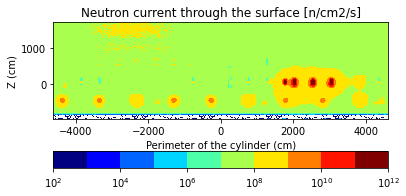

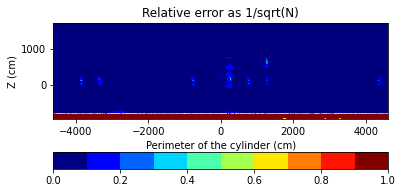

In [7]:
# This code is only necessary if it hasnt been run before
# from rssa_analyzer import RSSA
# my_rssa = RSSA(filename='tests/data/E-Lite_IVVS_v5.5.w')

# Plot function
my_rssa.plotter.plot_current_cyl(particle='n',  # plot the neutron tracks
                                 z_int=100,  # vertical divisions
                                 theta_int=360,  # horizontal divisions
                                 save_as='PICTURE' )

# Plot cylindrical RSSA with custom parameters

The area of a cell is 550.00cm2
The resolution is 22.22cm x 24.75cm


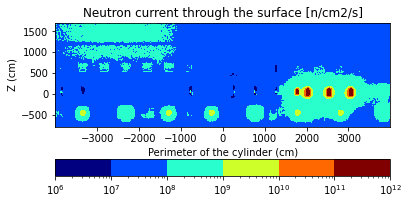

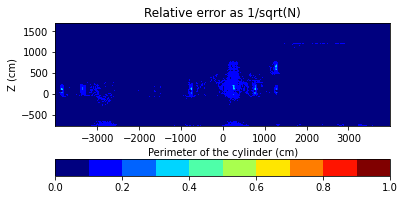

In [9]:
my_rssa.plotter.plot_current_cyl(particle='n',  # plot the neutron tracks
                                 z_int=100,  # vertical divisions
                                 theta_int=360,  # horizontal divisions
                                 source_intensity=2e20,  # used in the normalization of results
                                 value_range=(1e6, 1e12),  # range of colors in the legend
                                 x_range=(-4000, 4000),  # x limits of the plot
                                 z_range=(-775, 1700))  # y limits of the plot 